Assignment 3 - Supervised Learning and Dimensionality Reduction
Clustering Algorithms
1. K-Means
2. Expectation Maximization

Dimensionality Reduction Algorithms
1. PCA
2. ICA
3. Randomized Projections
4. Random Forest Dimensionality Reduction

In [24]:
# Import Block
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# Voice-Classification Dataset Preprocessing

In [8]:
data = pd.read_csv('voice-classification.csv', sep=',')

feature_columns = ['meanfreq','sd','median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'mode',
                    'sp.ent','sfm','centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 
                   'mindom', 'maxdom','dfrange','modindx']
cleanup_nums = cleanup_nums = {"label":{"male": 1, "female": 0}}

data.replace(cleanup_nums, inplace=True)

X = data[feature_columns]
#y = data['label']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Expectation Maximization

## Number of Clusters vs. Random Score

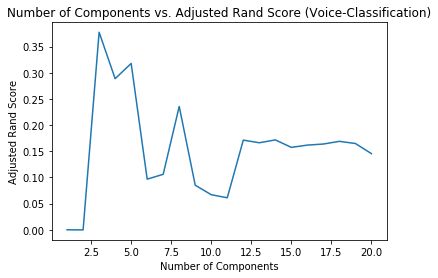

In [10]:
scores = []
components = []
iterations_needed_to_converge = []
log_likelihood = []

for component in range(1,21):
    em = GaussianMixture(n_components=component).fit(X_scaled)
    labels = em.predict(X_scaled)
    iters = em.n_iter_
    lower_bound = em.lower_bound_
    score = metrics.adjusted_rand_score(labels, y)
    scores.append(score)
    components.append(component)
    log_likelihood.append(lower_bound)
    iterations_needed_to_converge.append(iters)
    
plt.plot(components, scores)
plt.xlabel("Number of Components")
plt.ylabel("Adjusted Rand Score")
plt.title('Number of Components vs. Adjusted Rand Score (Voice-Classification)')
plt.savefig('Voice-EM-Number-of-Components-vs-Adjusted-Rand-Score.png')
plt.show()

C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


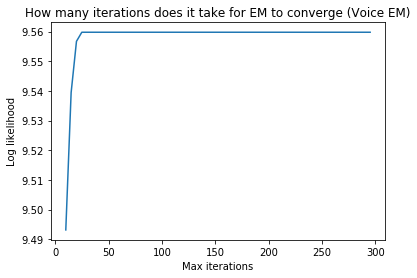

In [11]:
iterations = range(10,300,5)
log_likelihood = []

for iter in iterations:
    em = GaussianMixture(max_iter=iter, n_components=3, random_state=200 ).fit(X_scaled)
    lower_bound = em.lower_bound_
    log_likelihood.append(lower_bound)
    
plt.plot(iterations, log_likelihood)
plt.xlabel("Max iterations")
plt.ylabel("Log likelihood")
plt.title('How many iterations does it take for EM to converge (Voice EM)')
plt.savefig('How many iterations does it take for Em to converge-Voice-EM.png')
plt.show()

# PCA

In [13]:
pca = PCA( ).fit(X_scaled)
print (pca.explained_variance_ratio_.cumsum())

## So we can see that PCA has a great effect on our features. 
## 45% of the variance is explained by only one feature
## 57% by two features
## 75% by three features
## 94% by 9 features 
## I am using 94% variance as the cutoff in my case. 
## However, for visualization I will try to take 3 features to visualize the datapoints in 3D as 3 features
## explain 75% of the variance which should be enough to see the cluseters

print ("Now with only the best 9 features")
pca = PCA(n_components=9).fit(X_scaled)
print (pca.explained_variance_ratio_.cumsum())

[0.45216391 0.57087    0.67996939 0.75616702 0.8091064  0.85525606
 0.88730089 0.91628482 0.94080209 0.95955726 0.97611632 0.98507475
 0.99197766 0.99666813 0.99895725 0.99960278 1.         1.
 1.         1.        ]
Now with only the best 9 features
[0.45216391 0.57087    0.67996939 0.75616702 0.8091064  0.85525606
 0.88730089 0.91628482 0.94080209]


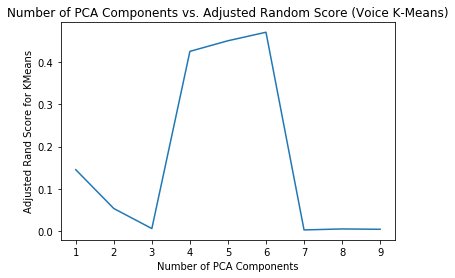

In [16]:
scores = []
pca_components = range(1,10,1)
all_intertia = []

for pc in pca_components:
    pca = PCA(n_components=pc).fit(X_scaled)
    features = pca.transform(X_scaled)
    scaler = StandardScaler()
    scaler.fit(features)
    features_scaled = scaler.transform(features)
    kmeans = KMeans(n_clusters=3).fit(features_scaled)
    score = metrics.adjusted_rand_score(y, kmeans.labels_)
    inertia = kmeans.inertia_
    all_intertia.append(inertia)
    scores.append(score)
    

plt.plot(pca_components, scores)
plt.xlabel("Number of PCA Components")
plt.ylabel("Adjusted Rand Score for KMeans")
plt.title('Number of PCA Components vs. Adjusted Random Score (Voice K-Means)')
plt.savefig('number of pca Components vs. Adjusted Random Score-Voice-K-Means.png')
plt.show()


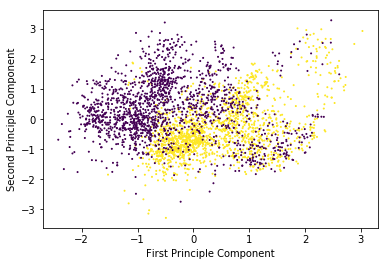

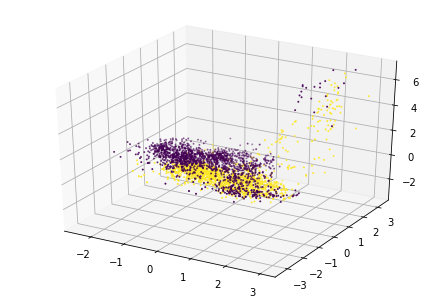

In [17]:
pca = PCA(n_components=3).fit(X_scaled)
features = pca.transform(X_scaled)
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

pca1, pca2, pca3 = zip(*features_scaled)

plt.scatter(pca1, pca2, s=1, c=y)
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.show()

ax = Axes3D(fig=plt.figure())

ax.scatter(xs=pca1,ys=pca2,zs=pca3,s=1,c=y)

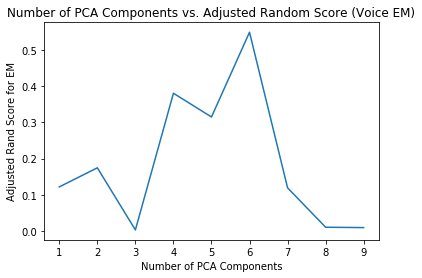

In [18]:
scores = []
pca_components = range(1,10,1)
all_intertia = []

for pc in pca_components:
    pca = PCA(n_components=pc).fit(X_scaled)
    features = pca.transform(X_scaled)
    scaler = StandardScaler()
    scaler.fit(features)
    features_scaled = scaler.transform(features)
    em = GaussianMixture(n_components=3).fit(features_scaled)
    labels = em.predict(features_scaled)
    score = metrics.adjusted_rand_score(y, labels)
    scores.append(score)
    

plt.plot(pca_components, scores)
plt.xlabel("Number of PCA Components")
plt.ylabel("Adjusted Rand Score for EM")
plt.title('Number of PCA Components vs. Adjusted Random Score (Voice EM)')
plt.savefig('number of pca Components vs. Adjusted Random Score-Voice-EM.png')
plt.show()

In [21]:
import itertools

from scipy import linalg
import matplotlib as mpl
from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

def plot_results_EM(X, Y_, means, covariances, index, title):
    _, splot = plt.subplots(1, sharex=True)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], s=2,color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xlim(-3., 3.)
    #plt.ylim(-1., 6.)
    plt.title(title)
    plt.show()
    

def draw_kmeans(X, labels, centroids, clusters):
    _, ax1 = plt.subplots(1, sharex=True)
    for i in range(clusters):
        # select only data observations with cluster label == i
        ds = X[np.where(labels==i)]
        # plot the data observations
        ax1.scatter(ds[:,0],ds[:,1],s=1)
        # plot the centroids
        lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        plt.setp(lines,ms=15.0)
        plt.setp(lines,mew=2.0)
    plt.show()

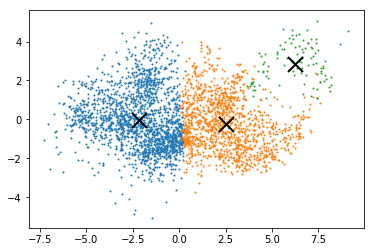

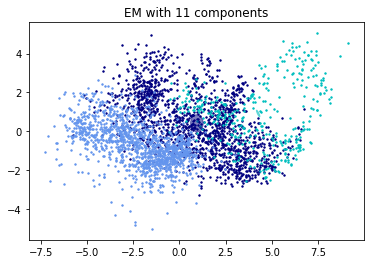

In [22]:
pca = PCA(n_components=13).fit(X_scaled)
features = pca.transform(X_scaled)


kmeans = KMeans(n_clusters=3).fit(features)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
draw_kmeans(features, labels, centroids, 3)

em = GaussianMixture(n_components=3).fit(features)
plot_results_EM(features, em.predict(features), em.means_, em.covariances_, 3, "EM with 11 components")

# ICA

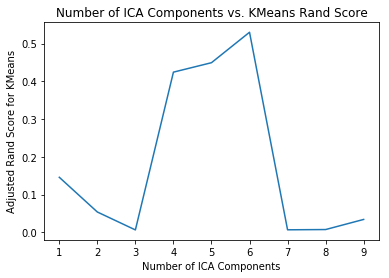

In [31]:
scores = []
ica_components = range(1,10,1)
all_intertia = []

for ic in ica_components:
    ica = FastICA(n_components=ic).fit(X_scaled)
    features = ica.transform(X_scaled)
    scaler = StandardScaler()
    scaler.fit(features)
    features_scaled = scaler.transform(features)
    kmeans = KMeans(n_clusters=3).fit(features_scaled)
    score = metrics.adjusted_rand_score(y, kmeans.labels_)
    inertia = kmeans.inertia_
    all_intertia.append(inertia)
    scores.append(score)
    

plt.plot(ica_components, scores)
plt.xlabel("Number of ICA Components")
plt.ylabel("Adjusted Rand Score for KMeans")
plt.title('Number of ICA Components vs. KMeans Rand Score')
plt.savefig('number of ICA Components vs. Adjusted Random Score-Voice-Kmeans.png')
plt.show()

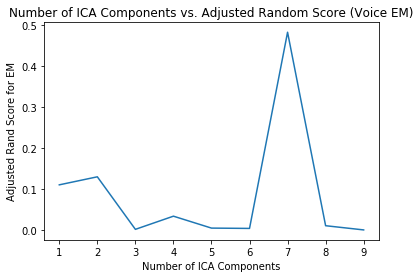

In [38]:
scores = []
ica_components = range(1,10,1)
all_intertia = []

for ic in ica_components:
    ica = FastICA(n_components=ic).fit(X_scaled)
    features = ica.transform(X_scaled)
    scaler = StandardScaler()
    scaler.fit(features)
    features_scaled = scaler.transform(features)
    em = GaussianMixture(n_components=3).fit(features_scaled)
    labels = em.predict(features_scaled)
    score = metrics.adjusted_rand_score(y, labels)
    scores.append(score)
    

plt.plot(ica_components, scores)
plt.xlabel("Number of ICA Components")
plt.ylabel("Adjusted Rand Score for EM")
plt.title('Number of ICA Components vs. Adjusted Random Score (Voice EM)')
plt.savefig('number of pca Components vs. Adjusted Random Score-Voice-EM.png')
plt.show()

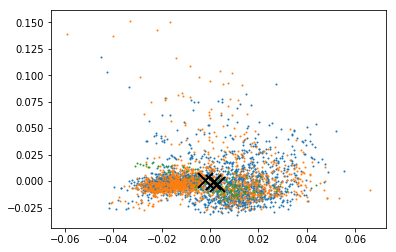

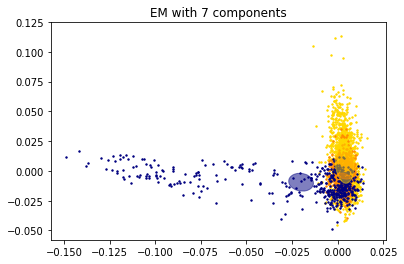

In [44]:
ica = FastICA(n_components=6).fit(X_scaled)
features = ica.transform(X_scaled)


kmeans = KMeans(n_clusters=3).fit(features)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
draw_kmeans(features, labels, centroids, 3)

ica = FastICA(n_components=8).fit(X_scaled)
features = ica.transform(X_scaled)
em = GaussianMixture(n_components=3).fit(features)
plot_results_EM(features, em.predict(features), em.means_, em.covariances_, 3, "EM with 7 components")

# Random Projection

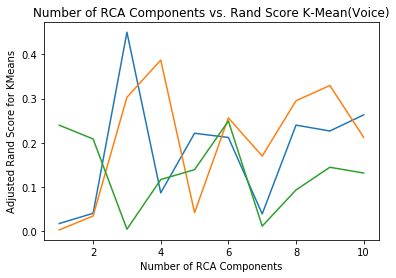

In [51]:
scores = []
random_components = range(1,11,1)


for i in range(3):
    for rc in random_components:
        #print(rc)
        rca = SparseRandomProjection(n_components=rc).fit(X_scaled)
        features = rca.transform(X_scaled)
        scaler = StandardScaler()
        scaler.fit(features)
        features_scaled = scaler.transform(features)
        kmeans = KMeans(n_clusters=3, random_state=2).fit(features_scaled)
        score = metrics.adjusted_rand_score(y, kmeans.labels_)
        scores.append(score)
        #print (max(scores))
        #print (min(scores))
    plt.plot(random_components, scores)
    scores = []
    

plt.xlabel("Number of RCA Components")
plt.ylabel("Adjusted Rand Score for KMeans")
plt.title('Number of RCA Components vs. Rand Score K-Mean(Voice)')
plt.savefig('number of rca components vs. Rand Score K-Mean(Voice).png')
plt.show()

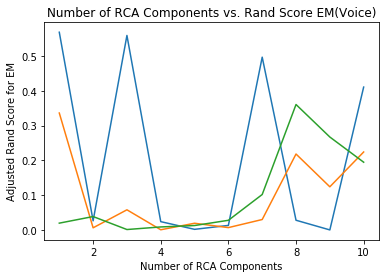

In [52]:
scores = []
random_components = range(1,11,1)


for i in range(3):
    for rc in random_components:
        rca = SparseRandomProjection(n_components=rc).fit(X_scaled)
        features = rca.transform(X_scaled)
        scaler = StandardScaler()
        scaler.fit(features)
        features_scaled = scaler.transform(features)
        em = GaussianMixture(n_components=3, random_state=2).fit(features_scaled)
        labels = em.predict(features_scaled)
        score = metrics.adjusted_rand_score(y, labels)
        scores.append(score)
    plt.plot(random_components, scores)
    scores = []
    

plt.xlabel("Number of RCA Components")
plt.ylabel("Adjusted Rand Score for EM")
plt.title('Number of RCA Components vs. Rand Score EM(Voice)')
plt.savefig('number of rca components vs. Rand Score EM(Voice).png')
plt.show()

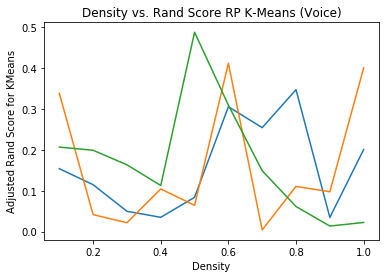

In [57]:
scores = []
density = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for i in range(3):
    for d in density:
        rca = SparseRandomProjection(n_components=8, density=d).fit(X_scaled)
        features = rca.transform(X_scaled)
        scaler = StandardScaler()
        scaler.fit(features)
        features_scaled = scaler.transform(features)
        kmeans = KMeans(n_clusters=3).fit(features_scaled)
        labels = kmeans.labels_
        score = metrics.adjusted_rand_score(y, labels)
        scores.append(score)
    plt.plot(density, scores)
    scores = []
    

plt.xlabel("Density")
plt.ylabel("Adjusted Rand Score for KMeans")
plt.title('Density vs. Rand Score RP K-Means (Voice)')
plt.savefig('densite vs rand score RP k-means voice.png')
plt.show()

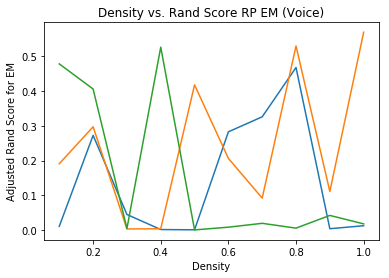

In [58]:
scores = []
density = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for i in range(3):
    for d in density:
        rca = SparseRandomProjection(n_components=8, density=d).fit(X_scaled)
        features = rca.transform(X_scaled)
        scaler = StandardScaler()
        scaler.fit(features)
        features_scaled = scaler.transform(features)
        em = GaussianMixture(n_components=3, random_state=0).fit(features_scaled)
        labels = em.predict(features_scaled)
        score = metrics.adjusted_rand_score(y, labels)
        scores.append(score)
    plt.plot(density, scores)
    scores = []
    

plt.xlabel("Density")
plt.ylabel("Adjusted Rand Score for EM")
plt.title('Density vs. Rand Score RP EM (Voice)')
plt.savefig('densite vs rand score RP EM voice.png')
plt.show()

# Learning Curves of Neural Net w/ Features Generated by Dimension Reduction Algorithms:
## PCA, ICA, RP, AE

In [59]:
from sklearn.model_selection import learning_curve
import numpy as np

[1.         1.         0.99865986 0.9973279  0.99722807]
[0.5        0.5        0.76530531 0.94796991 0.95552504]


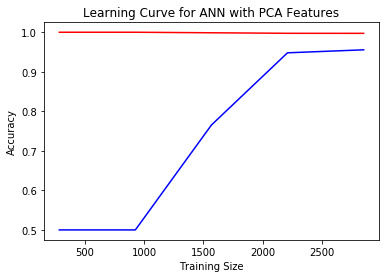

In [63]:
pca = PCA(n_components=9).fit(X_scaled)
features = pca.transform(X_scaled)
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)


mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10), solver='lbfgs')
train_sizes, train_scores, test_scores = learning_curve(mlp, features_scaled, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)

plt.plot(train_sizes, train_scores_mean, 'r')
plt.plot(train_sizes, test_scores_mean, 'b')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for ANN with PCA Features")
plt.savefig('Learning Cureve for ANN with PCA Features (Voice).png')
plt.show()

[1.         1.         0.99821315 0.99587862 0.98915789]
[0.5        0.5        0.6914338  0.94105963 0.95079412]


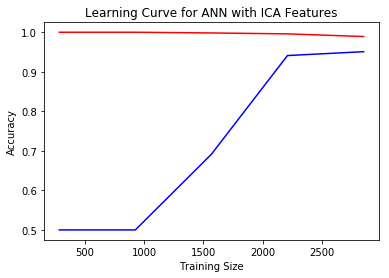

In [64]:
ica = FastICA(n_components=7).fit(X_scaled)
features = ica.transform(X_scaled)
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)


mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10), solver='lbfgs')
train_sizes, train_scores, test_scores = learning_curve(mlp, features_scaled, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)

plt.plot(train_sizes, train_scores_mean, 'r')
plt.plot(train_sizes, test_scores_mean, 'b')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for ANN with ICA Features")
plt.savefig('Learning Cureve for ANN with ICA Features (Voice).png')
plt.show()

[1.         1.         0.99495852 0.98627717 0.9834386 ]
[0.5        0.5        0.74761166 0.95205597 0.9416388 ]


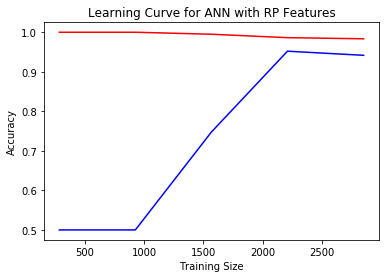

In [66]:
rca = SparseRandomProjection(n_components=6).fit(X_scaled)
features = rca.transform(X_scaled)
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10), solver='lbfgs')
train_sizes, train_scores, test_scores = learning_curve(mlp, features_scaled, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)

plt.plot(train_sizes, train_scores_mean, 'r')
plt.plot(train_sizes, test_scores_mean, 'b')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for ANN with RP Features")
plt.savefig('Learning Cureve for ANN with RP Features (Voice).png')
plt.show()


# ANN Learning Curve for K-Means and EM
## K-Means

In [67]:
kmeans = KMeans(n_clusters=3).fit(X_scaled)
centroids = kmeans.cluster_centers_ ##array of dimension (n_clusters, n_features)
new_features = []
for sample in X_scaled:
    newSample = []
    for center in centroids:
        dist = np.linalg.norm(sample - center)
        newSample.append(dist)
    new_features.append(newSample)

In [72]:
# PCA
pca = PCA(n_components=9).fit(X_scaled)
features = pca.transform(X_scaled)
scaler = StandardScaler()
scaler.fit(features)
pca_features = scaler.transform(features)

[1.         1.         0.94045948 0.78781703 0.75357895]
[0.5        0.5        0.51672638 0.65534193 0.70593703]


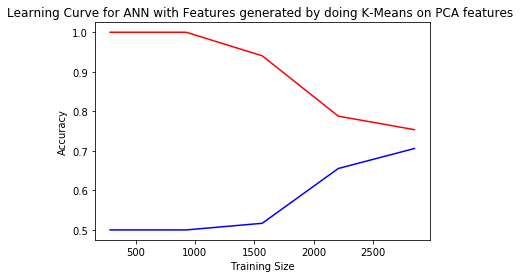

In [73]:
kmeans = KMeans(n_clusters=3).fit(pca_features)
centroids = kmeans.cluster_centers_ ##array of dimension (n_clusters, n_features)
new_features = []
for sample in pca_features:
    newSample = []
    for center in centroids:
        dist = np.linalg.norm(sample - center)
        newSample.append(dist)
    new_features.append(newSample)

scaler = StandardScaler()
scaler.fit(new_features)
features_scaled = scaler.transform(new_features)

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10), solver='lbfgs')
train_sizes, train_scores, test_scores = learning_curve(mlp, features_scaled, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)

plt.plot(train_sizes, train_scores_mean, 'r')
plt.plot(train_sizes, test_scores_mean, 'b')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for ANN with Features generated by doing K-Means on PCA features ")
plt.savefig('Learning Curve for ANN with Features generated by doing K-Means on PCA features(voice).png')
plt.show()

In [70]:
# ICA
ica = FastICA(n_components=9).fit(X_scaled)
features = ica.transform(X_scaled)
scaler = StandardScaler()
scaler.fit(features)
ica_features = scaler.transform(features)

[1.         1.         0.94652202 0.8022192  0.76821053]
[0.5        0.5        0.5394256  0.67142743 0.71607953]


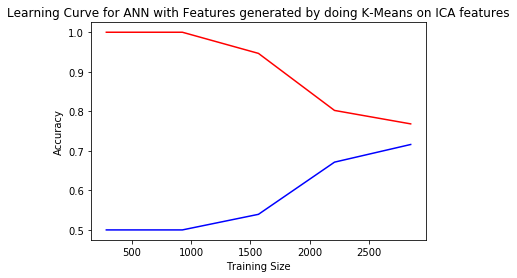

In [71]:
kmeans = KMeans(n_clusters=3).fit(ica_features)
centroids = kmeans.cluster_centers_ ##array of dimension (n_clusters, n_features)
new_features = []
for sample in ica_features:
    newSample = []
    for center in centroids:
        dist = np.linalg.norm(sample - center)
        newSample.append(dist)
    new_features.append(newSample)

scaler = StandardScaler()
scaler.fit(new_features)
features_scaled = scaler.transform(new_features)

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10), solver='lbfgs')
train_sizes, train_scores, test_scores = learning_curve(mlp, features_scaled, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)

plt.plot(train_sizes, train_scores_mean, 'r')
plt.plot(train_sizes, test_scores_mean, 'b')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for ANN with Features generated by doing K-Means on ICA features")
plt.savefig('Learning Curve for ANN with Features generated by doing K-Means on ICA features(voice).png')
plt.show()


In [74]:
# RP
rca = SparseRandomProjection(n_components=8).fit(X_scaled)
features = rca.transform(X_scaled)
scaler = StandardScaler()
scaler.fit(features)
rca_features = scaler.transform(features)

[1.         1.         0.92042119 0.80475543 0.77912281]
[0.5        0.5        0.53033994 0.70421742 0.72466762]


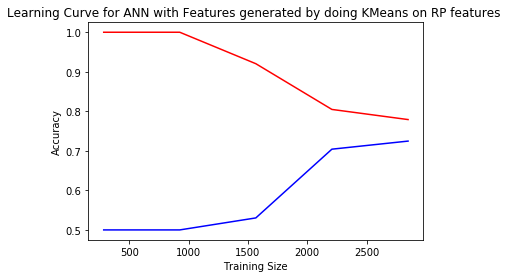

In [76]:
kmeans = KMeans(n_clusters=3).fit(rca_features)
centroids = kmeans.cluster_centers_
new_features = []
for sample in rca_features:
    newSample = []
    for center in centroids:
        dist = np.linalg.norm(sample - center)
        newSample.append(dist)
    new_features.append(newSample)

scaler = StandardScaler()
scaler.fit(new_features)
features_scaled = scaler.transform(new_features)

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10), solver='lbfgs')
train_sizes, train_scores, test_scores = learning_curve(mlp, features_scaled, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)

plt.plot(train_sizes, train_scores_mean, 'r')
plt.plot(train_sizes, test_scores_mean, 'b')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for ANN with Features generated by doing KMeans on RP features ")
plt.savefig('Learning Curve for ANN with Features generated by doing KMeans on RP features.png')
plt.show()

## EM

In [77]:
# PCA
pca = PCA(n_components=9).fit(X_scaled)
features = pca.transform(X_scaled)
scaler = StandardScaler()
scaler.fit(features)
pca_features = scaler.transform(features)

[1.         1.         0.96719847 0.95620471 0.95750877]
[0.5        0.5        0.8466185  0.93350649 0.9388723 ]


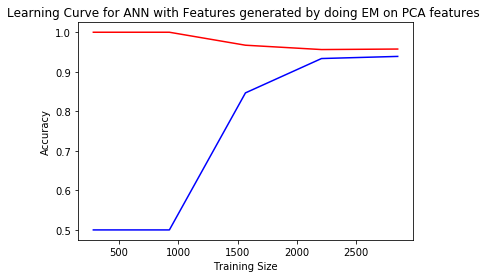

In [78]:
em = GaussianMixture(n_components=3).fit(pca_features)
centroids = em.means_
new_features = []
for sample in pca_features:
    newSample = []
    for center in centroids:
        dist = np.linalg.norm(sample - center)
        newSample.append(dist)
    new_features.append(newSample)

scaler = StandardScaler()
scaler.fit(new_features)
features_scaled = scaler.transform(new_features)

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10), solver='lbfgs')
train_sizes, train_scores, test_scores = learning_curve(mlp, features_scaled, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)

plt.plot(train_sizes, train_scores_mean, 'r')
plt.plot(train_sizes, test_scores_mean, 'b')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for ANN with Features generated by doing EM on PCA features ")
plt.savefig('Learning Curve for ANN with Features generated by doing EM on PCA features.png')
plt.show()

In [79]:
# ICA
ica = FastICA(n_components=9).fit(X_scaled)
features = ica.transform(X_scaled)
scaler = StandardScaler()
scaler.fit(features)
ica_features = scaler.transform(features)

[1.         1.         0.94262923 0.89624094 0.90747368]
[0.5        0.5        0.75846867 0.86695924 0.87959756]


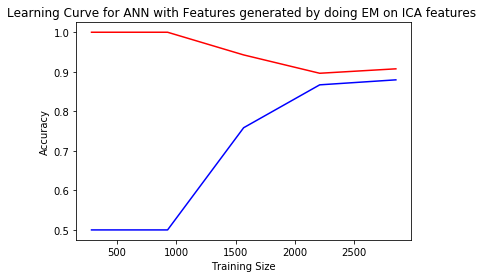

In [80]:
em = GaussianMixture(n_components=3).fit(ica_features)
centroids = em.means_
new_features = []
for sample in ica_features:
    newSample = []
    for center in centroids:
        dist = np.linalg.norm(sample - center)
        newSample.append(dist)
    new_features.append(newSample)

scaler = StandardScaler()
scaler.fit(new_features)
features_scaled = scaler.transform(new_features)

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10), solver='lbfgs')
train_sizes, train_scores, test_scores = learning_curve(mlp, features_scaled, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)

plt.plot(train_sizes, train_scores_mean, 'r')
plt.plot(train_sizes, test_scores_mean, 'b')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for ANN with Features generated by doing EM on ICA features ")
plt.savefig('Learning Curve for ANN with Features generated by doing EM on ICA features.png')
plt.show()

In [81]:
# RP
rca = SparseRandomProjection(n_components=8).fit(X_scaled)
features = rca.transform(X_scaled)
scaler = StandardScaler()
scaler.fit(features)
rca_features = scaler.transform(features)

[1.         1.         0.91761327 0.82912138 0.82480702]
[0.5        0.5        0.54914617 0.7845693  0.78799459]


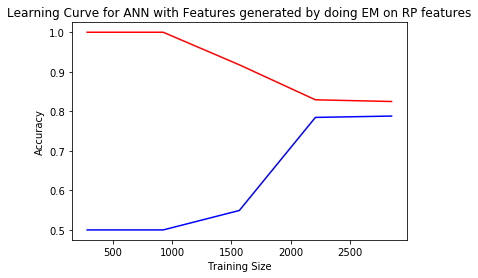

In [82]:
em = GaussianMixture(n_components=3).fit(rca_features)
centroids = em.means_
new_features = []
for sample in rca_features:
    newSample = []
    for center in centroids:
        dist = np.linalg.norm(sample - center)
        newSample.append(dist)
    new_features.append(newSample)

scaler = StandardScaler()
scaler.fit(new_features)
features_scaled = scaler.transform(new_features)

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10), solver='lbfgs')
train_sizes, train_scores, test_scores = learning_curve(mlp, features_scaled, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)

plt.plot(train_sizes, train_scores_mean, 'r')
plt.plot(train_sizes, test_scores_mean, 'b')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for ANN with Features generated by doing EM on RP features")
plt.savefig('Learning Curve for ANN with Features generated by doing EM on RP features.png')
plt.show()
